<a href="https://colab.research.google.com/github/ASingh-AGH/AI_Collab/blob/main/IAI%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to AI: Clustering data using scikit-learn

Clustering algorithms can automatically find ways to group multidimensional data into clusters.

In this class, we will use scikit-learn to predict clusters using various algorithms.
As you experiment with each clustering algorithm, you will see some of the advantages and disadvantages of each one:

* K-Means
* MeanShift
* DBSCAN
* AgglomerativeClustering

To help visualize the clusters, we will use charts to show how does the clustering look like.

Finally, since we can play with the same data used for supervised learning, we might check how unsupervised clustering can create groups of clients with similar attributes.


## Imports

Import the Python modules we need into the rest of the notebook:

In [ ]:
%matplotlib inline
from time import sleep
from IPython.display import display, clear_output
import matplotlib as mpl
import matplotlib.animation
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import lines
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs # Datasets
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles 
from sklearn.model_selection import train_test_split  # Cross validation library

Import additional helpful functions for data visualization:

In [ ]:
!wget -nc https://home.agh.edu.pl/~kluza/i2ai_utilities.py

File ‘i2ai_utilities.py’ already there; not retrieving.



In [ ]:
# Additional functions for data visualization
from i2ai_utilities import show_scatter_3d, show_scatter, plotly_scatter_3d, show_risk_by_cluster, plot_dendrogram

First, generate a two-dimensional dataset containing three distinct blobs. 

To emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization:

In [ ]:
X,y = make_blobs(centers=3, n_samples=200, random_state=0, cluster_std=0.7)
print(X[:10],y[:10])

[[-1.67173659  3.5340075 ]
 [ 0.73273157  4.41323161]
 [ 1.08473328  4.56850109]
 [-1.45849654  3.32594984]
 [ 1.1850368   5.23225746]
 [-0.98562693  2.08916581]
 [ 2.42001293  0.49461208]
 [ 1.70664481  2.2483361 ]
 [ 1.06510854  4.58517988]
 [-1.66036146  2.6414876 ]] [2 0 0 2 0 2 1 1 0 2]


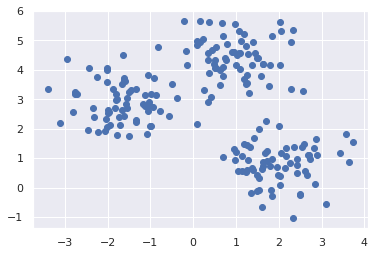

In [ ]:
show_scatter(X)

By eye, it is relatively easy to pick out the clusters 

(visualization with the generated labels "y"; these labels will not be used further for clustering):


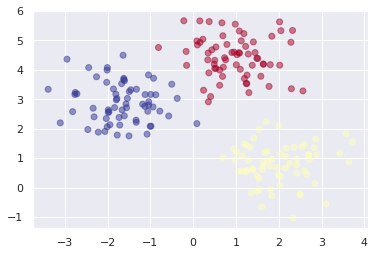

In [ ]:
show_scatter(X, y)

In the scikit-learn library, there is an implementation of the k-means algorithm. 

Apply it to the previously set of randomly generated blobs (assuming we forget about their labels).

184.23754416562906


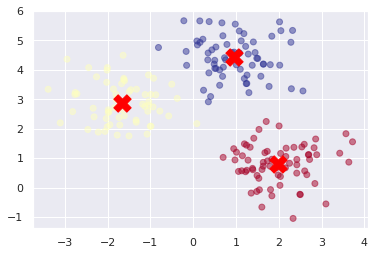

In [ ]:
k = 3
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_
print(kmeans.inertia_)
show_scatter(X, y_pred, centers)

How to choose the number of clusters?

In [ ]:
km_list = list()

for k in range(1,10):
    km = KMeans(n_clusters=k)
    y_pred = km.fit(X)
    km_list.append(pd.Series({'clusters': k, 
                              'inertia': km.inertia_}))

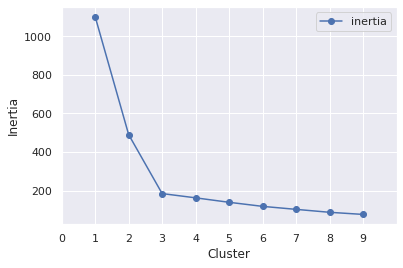

In [ ]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,10,1))
ax.set_xlim(0,10)
ax.set(xlabel='Cluster', ylabel='Inertia');

Now let's try another clustering algorithm, i.e. MeanShift.

From the code observation, what can you say about this algorithm? 

Number of clusters:  3


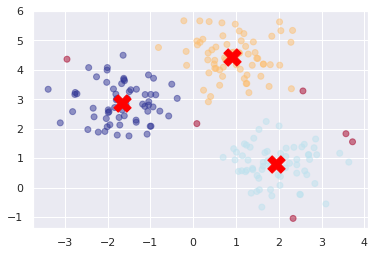

In [ ]:
ms = MeanShift(cluster_all=False)
y_pred = ms.fit_predict(X)
centers = ms.cluster_centers_
print("Number of clusters: ", len(centers))
show_scatter(X, y_pred, centers)

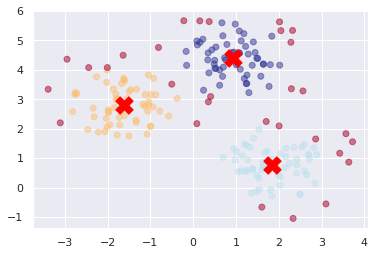

In [ ]:
# Additionally you can play with the bandwidth attribute
bandwidth = estimate_bandwidth(X, quantile=.2, n_samples=1000) 
ms = MeanShift(cluster_all=False, bandwidth=bandwidth)
y_pred = ms.fit_predict(X)
centers = ms.cluster_centers_
show_scatter(X, y_pred, centers)

Now let's apply the density-based clustering using the DBSCAN algorithm.

Number of clusters: 3
Number of outliers: 12


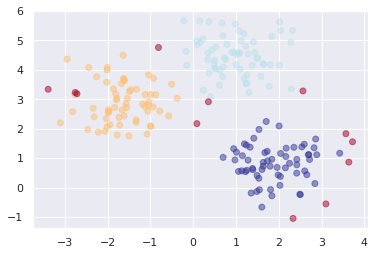

In [ ]:
dbscan = DBSCAN(eps=0.6)
y_pred = dbscan.fit_predict(X)
print('Number of clusters:', len(set(y_pred))-(1 if -1 in y_pred else 0))
print('Number of outliers:', list(y_pred).count(-1))
show_scatter(X, y_pred)

Finally, let's see how the agglomerative algorithm handles our data:

In [ ]:
ac = AgglomerativeClustering(n_clusters=None, distance_threshold=4, 
                             affinity='euclidean', linkage='complete')
y_pred = ac.fit_predict(X)
print('Number of clusters:', len(set(y_pred)))

Number of clusters: 3


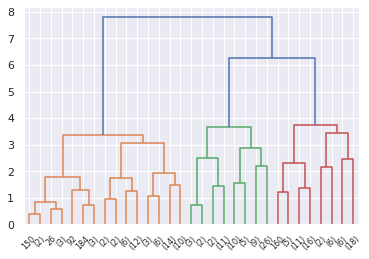

In [ ]:
plot_dendrogram(ac, truncate_mode='level', p=4)

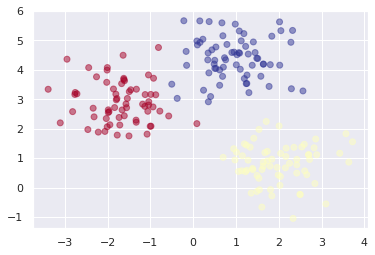

In [ ]:
show_scatter(X, y_pred)

## Excercise 1

Experiment with other types of data sets (see: moons and circles below) and try to determine which type of clustering algorithm will work best for them. Remember about checking various parameters for the algorithms, such as:
  * k for KMeans,
  * eps for DBSCAN, 
  * distance_threshold, affinity or linkage for AgglomerativeClustering.

**Put in the report your best results for each data sets, comparison and observations/conclusions about these four cluster algorithms (with the charts illustrating your results).**

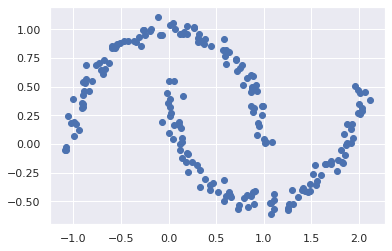

In [ ]:
X, y = make_moons(n_samples=200, noise=0.05)
show_scatter(X)

80.7929163042324


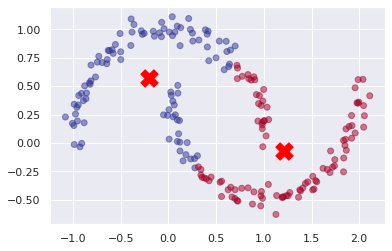

In [ ]:
#k for KMeans,
k = 2
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_
print(kmeans.inertia_)
show_scatter(X, y_pred, centers)

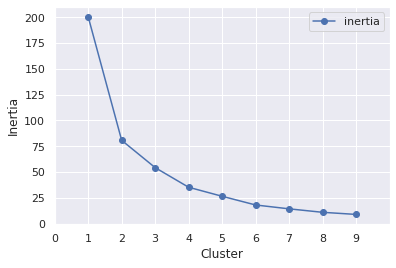

In [ ]:
km_list = list()

for k in range(1,10):
    km = KMeans(n_clusters=k)
    y_pred = km.fit(X)
    km_list.append(pd.Series({'clusters': k, 
                              'inertia': km.inertia_}))
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,10,1))
ax.set_xlim(0,10)
ax.set(xlabel='Cluster', ylabel='Inertia');

Number of clusters:  2


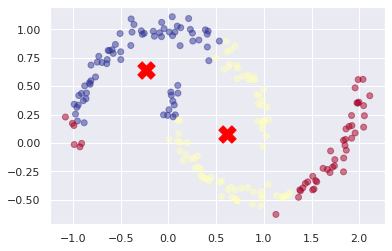

In [ ]:
ms = MeanShift(cluster_all=False)
y_pred = ms.fit_predict(X)
centers = ms.cluster_centers_
print("Number of clusters: ", len(centers))
show_scatter(X, y_pred, centers)

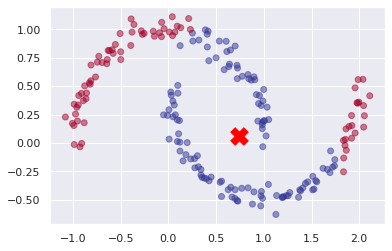

In [ ]:
bandwidth = estimate_bandwidth(X, quantile=.4, n_samples=1000) 
ms = MeanShift(cluster_all=False, bandwidth=bandwidth)
y_pred = ms.fit_predict(X)
centers = ms.cluster_centers_
show_scatter(X, y_pred, centers)

Number of clusters: 2
Number of outliers: 0


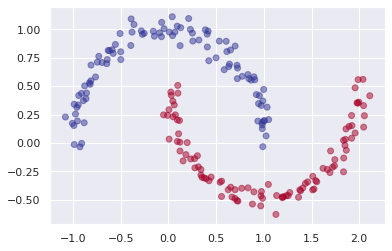

In [ ]:
#eps for DBSCAN,
dbscan = DBSCAN(eps=0.2)
y_pred = dbscan.fit_predict(X)
print('Number of clusters:', len(set(y_pred))-(1 if -1 in y_pred else 0))
print('Number of outliers:', list(y_pred).count(-1))
show_scatter(X, y_pred)

Number of clusters: 2


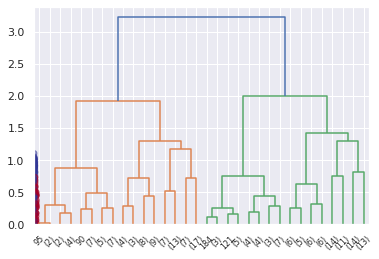

In [ ]:
#distance_threshold, affinity or linkage for AgglomerativeClustering.
ac = AgglomerativeClustering(n_clusters=None, distance_threshold=3, 
                             affinity='euclidean', linkage='complete')
y_pred = ac.fit_predict(X)
print('Number of clusters:', len(set(y_pred)))
plot_dendrogram(ac, truncate_mode='level', p=4)
show_scatter(X, y_pred)

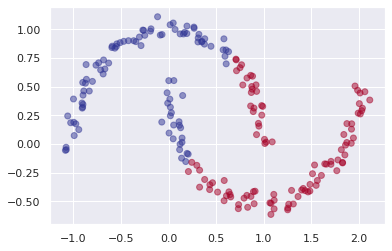

In [ ]:
show_scatter(X, y_pred)

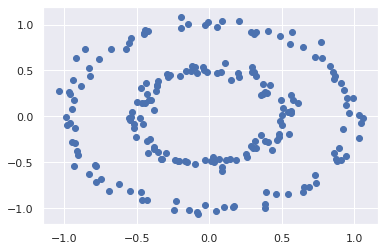

In [ ]:
X, y  = make_circles(n_samples=200, factor=0.5, noise=0.05)
show_scatter(X)

33.354594398334626


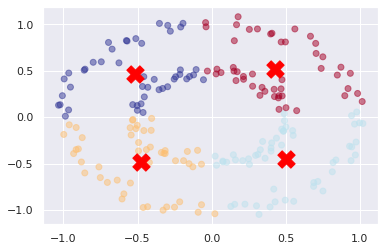

In [ ]:
k = 4
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_
print(kmeans.inertia_)
show_scatter(X, y_pred, centers)

In [ ]:
km_list = list()

for k in range(1,10):
    km = KMeans(n_clusters=k)
    y_pred = km.fit(X)
    km_list.append(pd.Series({'clusters': k, 
                              'inertia': km.inertia_}))

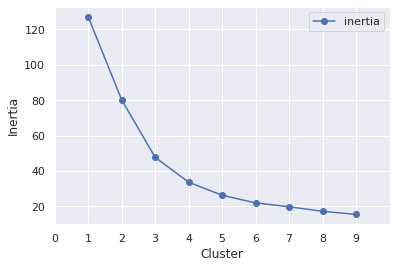

In [ ]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,10,1))
ax.set_xlim(0,10)
ax.set(xlabel='Cluster', ylabel='Inertia');

Number of clusters:  2


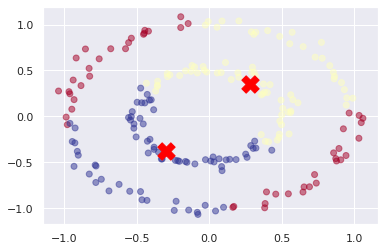

In [ ]:
ms = MeanShift(cluster_all=False)
y_pred = ms.fit_predict(X)
centers = ms.cluster_centers_
print("Number of clusters: ", len(centers))
show_scatter(X, y_pred, centers)

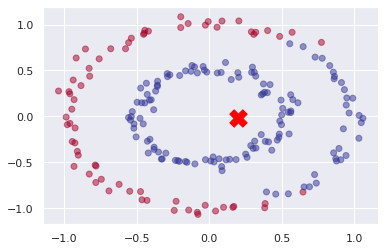

In [ ]:
# Additionally you can play with the bandwidth attribute
bandwidth = estimate_bandwidth(X, quantile=.4, n_samples=1000) 
ms = MeanShift(cluster_all=False, bandwidth=bandwidth)
y_pred = ms.fit_predict(X)
centers = ms.cluster_centers_
show_scatter(X, y_pred, centers)

Number of clusters: 2
Number of outliers: 0


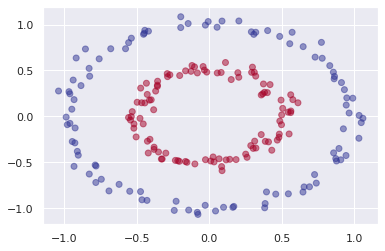

In [ ]:
dbscan = DBSCAN(eps=0.3)
y_pred = dbscan.fit_predict(X)
print('Number of clusters:', len(set(y_pred))-(1 if -1 in y_pred else 0))
print('Number of outliers:', list(y_pred).count(-1))
show_scatter(X, y_pred)

Number of clusters: 3


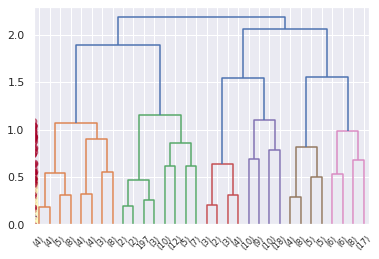

In [ ]:
ac = AgglomerativeClustering(n_clusters=None, distance_threshold=2, 
                             affinity='euclidean', linkage='complete')
y_pred = ac.fit_predict(X)
print('Number of clusters:', len(set(y_pred)))

plot_dendrogram(ac, truncate_mode='level', p=4)

show_scatter(X, y_pred)

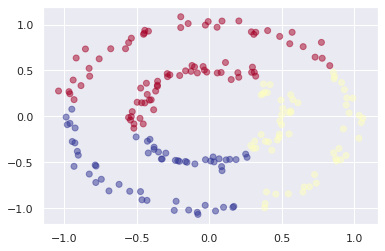

In [ ]:
show_scatter(X, y_pred)

## Excercise 2

One of the toy example but possible application of clustering is image color compression.

Try to use this technique for an image from the Scikit-Learn datasets module:

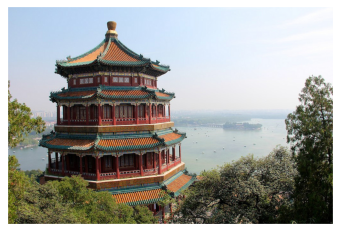

In [ ]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

The image is stored in a three-dimensional array of size (height, width, RGB), containing red/blue/green contributions as integers from 0 to 255:

In [ ]:
china.shape

(427, 640, 3)

Reshape the data to `[n_samples x n_features]`, and rescale the colors so that they lie between 0 and 1:

In [ ]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

Visualize these pixels in this color space, using a subset of 10,000 pixels for efficiency:

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

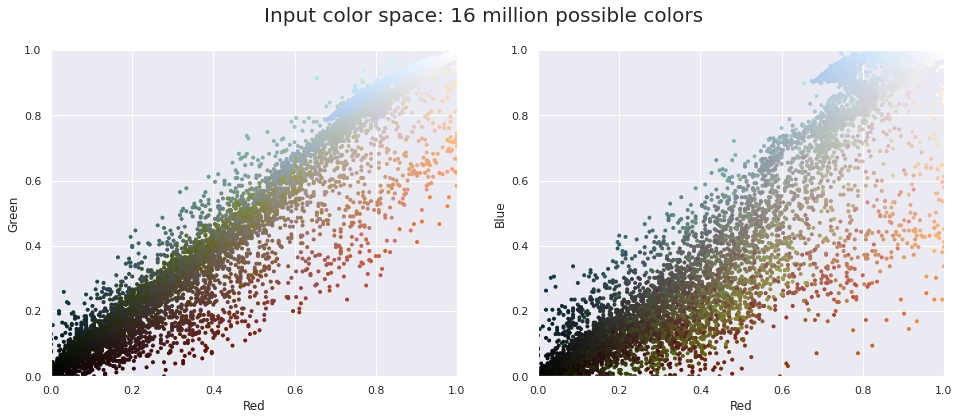

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

Reduce these 16 million colors to just 16 colors, using a k-means clustering across the pixel space (for faster calculation you can use MiniBatchKMeans instead of KMeans):

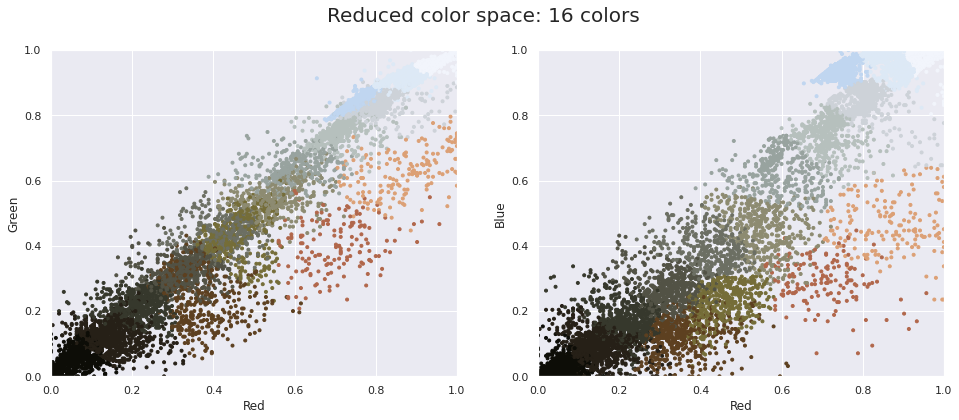

In [ ]:
kmeans = KMeans(n_clusters=16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

The result is a new picture, where each pixel is assigned the color of its closest cluster center. Plotting these new colors in the image space shows us the effect of this:

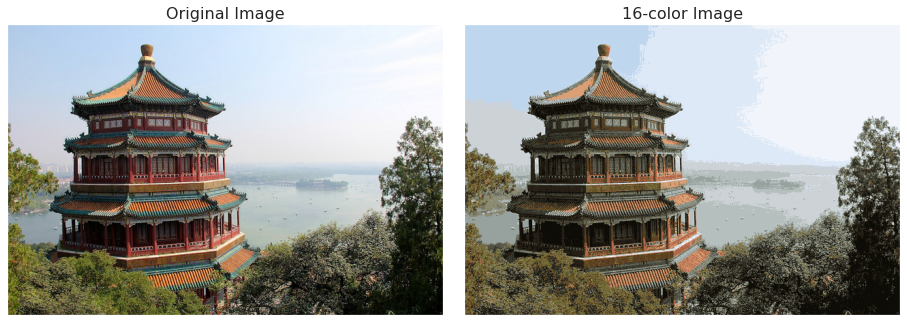

In [ ]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

**For the report, use another image and reduce the colors to less than 10 colours but in such a way that the image will stil resemble the original image. Put both original and compressed images in the report.**

Although we achieve quite a nice compression, there are better ways of compressing the information.

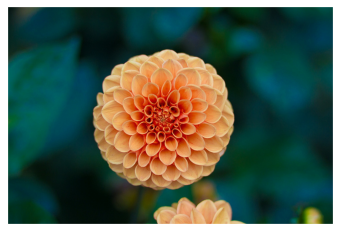

In [ ]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [ ]:
flower.shape

(427, 640, 3)

In [ ]:
data = flower / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

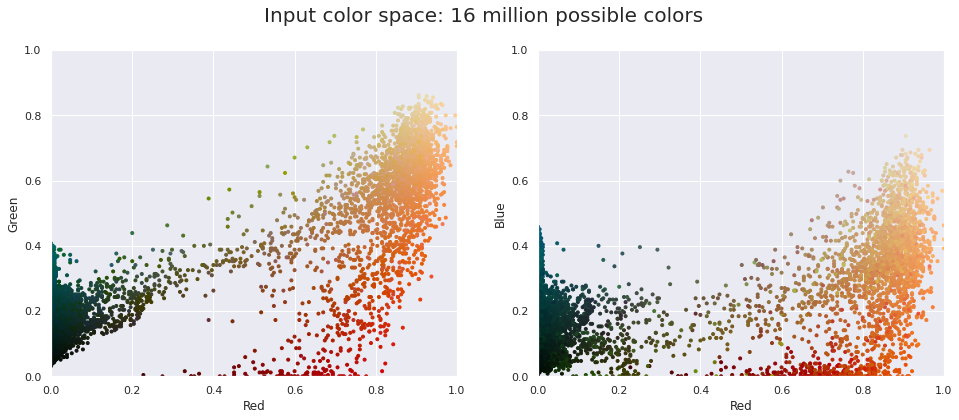

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

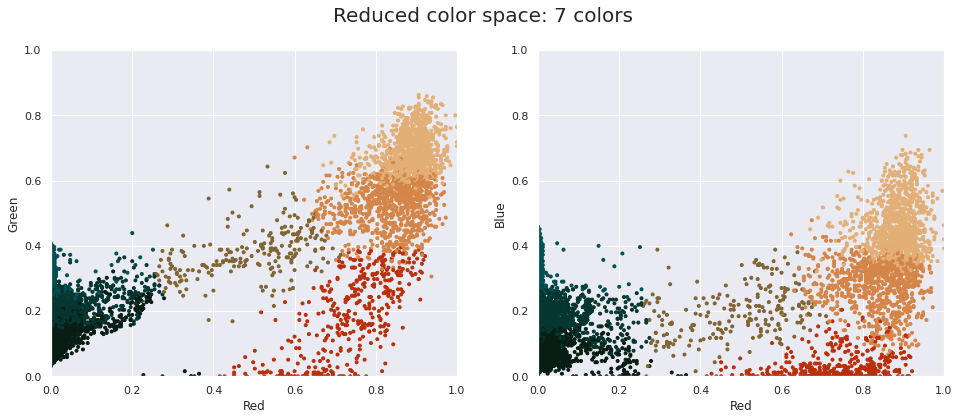

In [ ]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 7 colors")

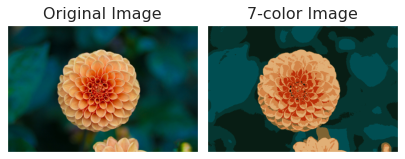

In [ ]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(7, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('7-color Image', size=16);

## Exercise 3



## Load customer and sales activity data

Use the cell below to load `merged_customers.csv` into Dataframe pandas.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/IBM/ml-learning-path-assets/master/data/mergedcustomers.csv")

## Prepare data 

Delete the `CHURNRISK` column as we do not want to use this label for clustering, but we will save it to try an external evaluation of our clusters later.
Select only a few numeric columns as features for our customer cluster tests -- including gains minus losses combined into one `PROFIT_YTD` column.

In [ ]:
# Save the CHURNRISK label column for later.
known_risk = df['CHURNRISK']

# Combine gains - losses into a profit column,
# and select a some of the numeric trader data to use for our customer clustering example.
keep_columns = ['AGE', 'TOTALUNITSTRADED', 'DAYSSINCELASTTRADE', 'DAYSSINCELASTLOGIN', 'PROFIT_YTD']

df_churn = df.assign(PROFIT_YTD=df.apply(lambda row: row.NETREALIZEDGAINS_YTD - row.NETREALIZEDLOSSES_YTD, axis=1).values)[keep_columns]

# Pick 3 features to use later in 3D charts
x_name = 'AGE'
y_name = 'PROFIT_YTD'
z_name = 'DAYSSINCELASTTRADE'

df_churn.head()

AGE  TOTALUNITSTRADED  DAYSSINCELASTTRADE  DAYSSINCELASTLOGIN  PROFIT_YTD
0   47                58                  13                   2  -152.76525
1   25                13                  10                   4  1349.63500
2   42                28                   5                   4  1123.61250
3   52                36                   6                   3  -652.56550
4   40                 8                   9                   4 -1496.14950

The customer dataset is more like real data. Visualize a selection of three features that might be important. We have not predicted clusters yet, so let's just show the color of the `CHURNRISK` label we wrote down.

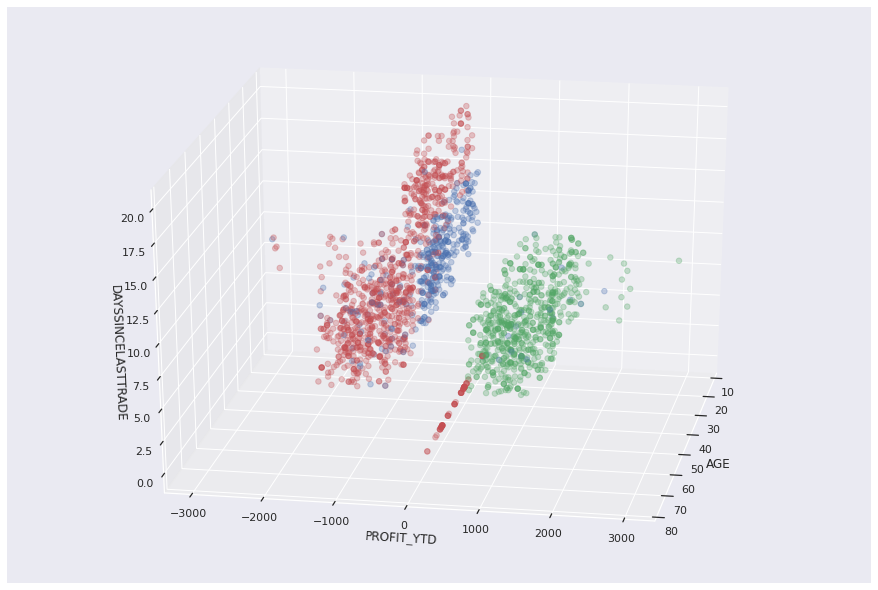

In [ ]:
# We did not use k-means yet, let's just use the labels for color
label_colors = known_risk.map({'High': 'r', 'Medium': 'b', 'Low': 'g'})

show_scatter_3d(df_churn, x_name, y_name, z_name, predicted=label_colors, show_colorbar=False);

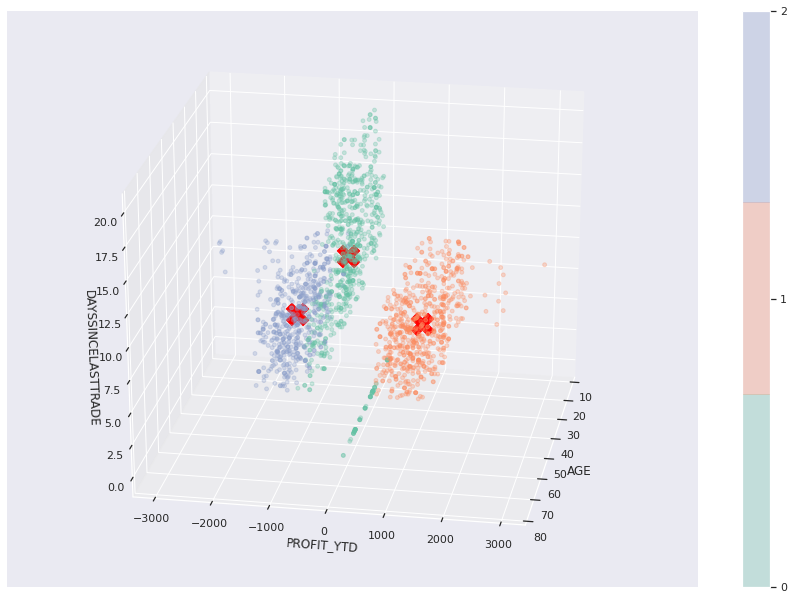

In [ ]:
k = 3
kmeans = KMeans(n_clusters=k)
predicted = kmeans.fit_predict(df_churn.values)
centers = kmeans.cluster_centers_

show_scatter_3d(df_churn, x_name, y_name, z_name, predicted=predicted, centers=centers);

#### 3D Visualization

Use Plotly chart to analyze data from different angles. Which column strongly influences cluster partitioning? Include your answer in the report.

In [ ]:
X_df = df_churn.copy()
X_df['CLUSTER'] = predicted
plotly_scatter_3d(X_df, x_name, y_name, z_name, color='CLUSTER')

In [ ]:
ms = MeanShift(cluster_all=False)
predicted = ms.fit_predict(df_churn.values)
labels = ms.labels_
centers = ms.cluster_centers_

print("Number of clusters: ", len(centers))

In [ ]:
show_scatter_3d(df_churn, x_name, y_name, z_name, predicted=predicted, centers=centers,
                show_colorbar=False,
                cmap=ListedColormap(cm.Accent.colors[:6]));

In [ ]:
temp_df = df_churn.copy()
temp_df['CLUSTER'] = predicted
no_outliers_df = temp_df[temp_df['CLUSTER']!=-1]
outliers_df = temp_df[temp_df['CLUSTER']==-1]

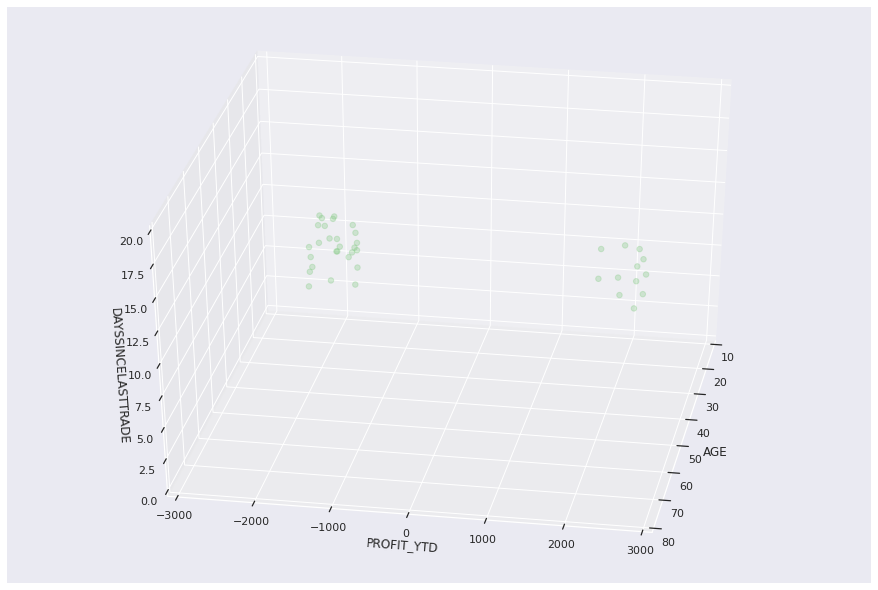

In [ ]:
charts = [
    {'dataframe': temp_df, 'centers': centers, 'cmap': ListedColormap(cm.Accent.colors[:6])},
    {'dataframe': outliers_df, 'centers': centers, 'cmap': ListedColormap(cm.Accent.colors[:1])},
    {'dataframe': temp_df, 'centers': centers, 'cmap': ListedColormap(cm.Accent.colors[:6])},
    {'dataframe': no_outliers_df, 'centers': centers, 'cmap': ListedColormap(cm.Accent.colors[1:6])},
    {'dataframe': temp_df, 'centers': centers, 'cmap': ListedColormap(cm.Accent.colors[:6])},
    {'dataframe': no_outliers_df, 'centers': None, 'cmap': ListedColormap(cm.Accent.colors[1:6])},
    {'dataframe': temp_df, 'centers': None, 'cmap': ListedColormap(cm.Accent.colors[:6])},
    {'dataframe': no_outliers_df, 'centers': None, 'cmap': ListedColormap(cm.Accent.colors[1:6])},
    {'dataframe': temp_df, 'centers': None, 'cmap': ListedColormap(cm.Accent.colors[:6])},
    {'dataframe': outliers_df, 'centers': None, 'cmap': ListedColormap(cm.Accent.colors[:1])},
    {'dataframe': temp_df, 'centers': None, 'cmap': ListedColormap(cm.Accent.colors[:6])},
    {'dataframe': outliers_df, 'centers': None, 'cmap': ListedColormap(cm.Accent.colors[:1])}
]

# n loops for more time to watch charts
loops = 2
for loop in range(loops):
  for chart in charts:
    clear_output(wait=True)
    fig, ax = show_scatter_3d(chart['dataframe'], x_name, y_name, z_name, predicted=chart['dataframe']['CLUSTER'],
                centers=chart['centers'],
                show_colorbar=False, cmap=chart['cmap'],
                elev=35, azim=10,
                xlim3d=(10, 80), ylim3d=(-3000, 3000), zlim3d=(0, 20))
        
    display(fig)
    plt.close(fig)
    sleep(1)

In [ ]:
from sklearn.cluster import DBSCAN
predicted = DBSCAN(eps=110).fit_predict(df_churn)

print('Number of clusters:', len(set(predicted)) - (1 if -1 in predicted else 0))
print('Number of outliers:', list(predicted).count(-1))

Number of clusters: 6
Number of outliers: 23


In [ ]:
temp_df = df_churn.copy()
temp_df['CLUSTER'] = predicted
temp_df['KNOWN_RISK'] = known_risk
temp_df.columns = [str(x) for x in temp_df.columns.values]
no_outliers_df = temp_df[temp_df['CLUSTER']!=-1]
outliers_df = temp_df[temp_df['CLUSTER']==-1]

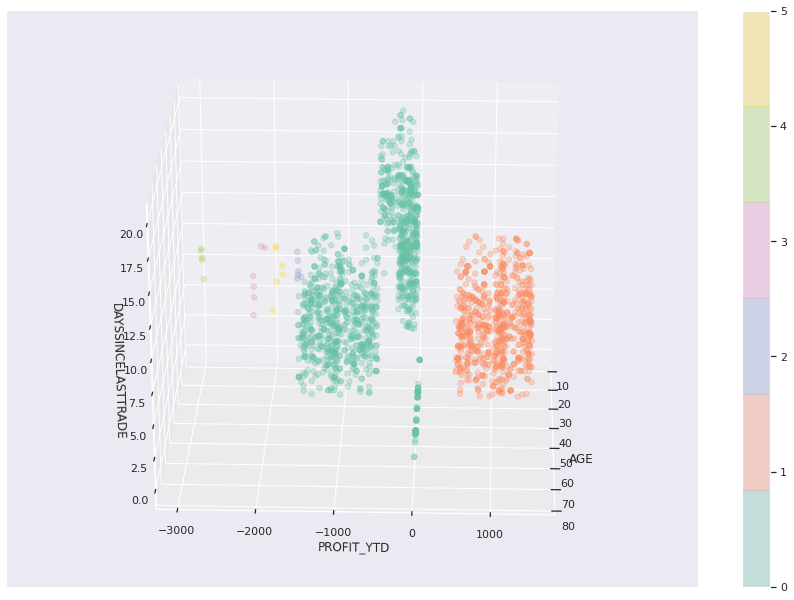

In [ ]:
show_scatter_3d(no_outliers_df, x_name, y_name, z_name, predicted=no_outliers_df['CLUSTER'], azim=2);

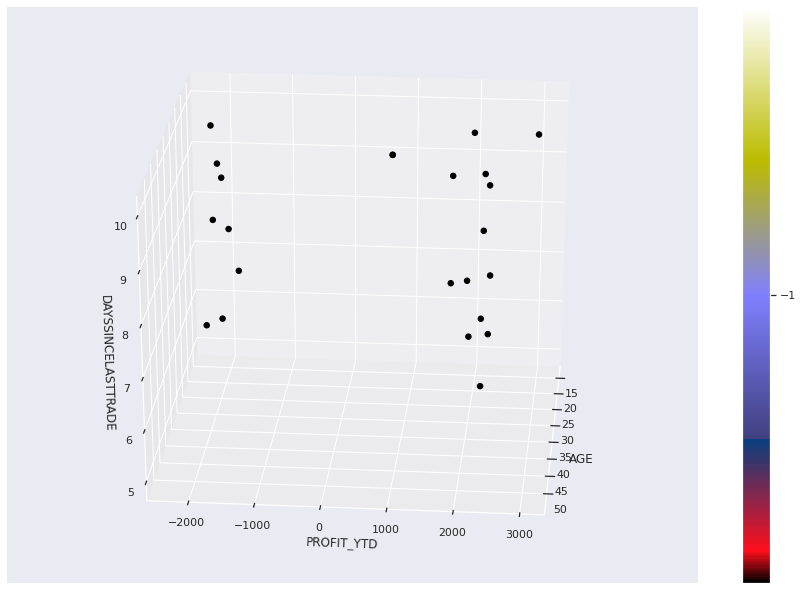

In [ ]:
show_scatter_3d(outliers_df, x_name, y_name, z_name, predicted=outliers_df['CLUSTER'], cmap=cm.gist_stern, alpha=1, azim=5);

By modifying the values of the algorithm parameters `distance_threshold` -- distance and `affinity` -- type of metric: 'manhattan' or 'euclidean', choose the parameters to best represent the actual values in your opinion. 
**Include the results in your report.**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=None, distance_threshold=500, 
                             affinity='euclidean', linkage='complete')
predicted = ac.fit_predict(df_churn.values)

print('Number of clusters:', len(set(predicted)))

Number of clusters: 14


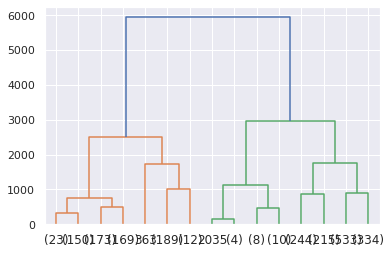

In [ ]:
plot_dendrogram(ac, truncate_mode='level', p=3)

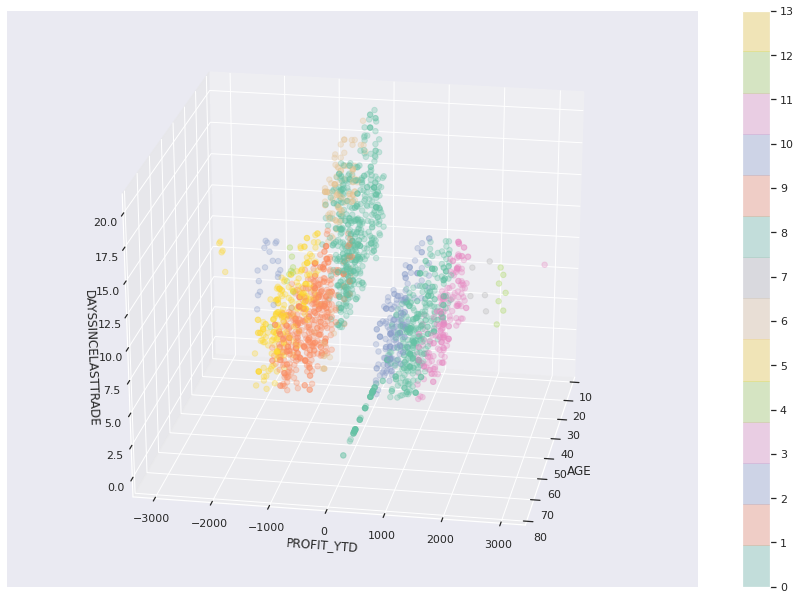

In [ ]:
show_scatter_3d(df_churn, x_name, y_name, z_name, predicted=predicted);

In [ ]:
X_df = df_churn.copy()
X_df['CLUSTER'] = predicted
plotly_scatter_3d(X_df, x_name, y_name, z_name, color='CLUSTER')

**In the report answer and justify which column from the `mergedcustomers.csv` dataset strongly affects cluster partitioning.**

Number of clusters: 2


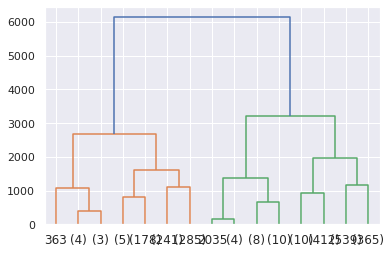

In [ ]:
#ADDED CODE ME

from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=None, distance_threshold=4000, 
                             affinity='manhattan', linkage='complete')
predicted = ac.fit_predict(df_churn.values)

print('Number of clusters:', len(set(predicted)))

plot_dendrogram(ac, truncate_mode='level', p=3)

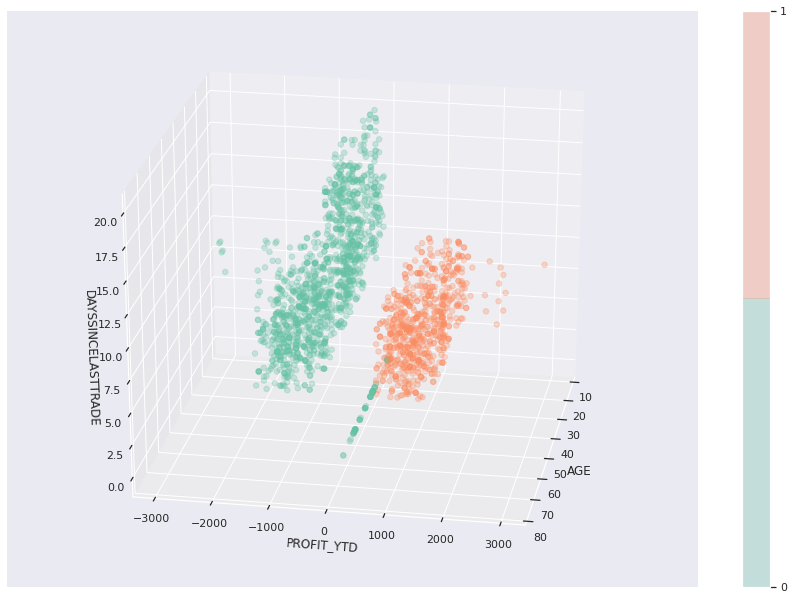

In [ ]:
show_scatter_3d(df_churn, x_name, y_name, z_name, predicted=predicted);

In [ ]:
X_df = df_churn.copy()
X_df['CLUSTER'] = predicted
plotly_scatter_3d(X_df, x_name, y_name, z_name, color='CLUSTER')